In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d
import utilities as u
import preprocessing as pp
import behavior as b

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [7]:
df = pp.load_session_db()
df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
# tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging|FreqMorph_Decision|FreqMorph_Timeout'
tracks = 'TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]
df = df[(df['ImagingRegion']=="") | (df['ImagingRegion']=="CA1")]

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!


In [8]:
mouse = '4139265.4'
df_mouse = df[df['MouseName'].str.match(mouse)]


In [51]:
# function for getting lick and speed data

def load_lick_mat(sess):
    VRDat= pp.behavior_dataframe(sess['data file'])
    trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
    lick_trial_mat= u.make_pos_bin_trial_matrices(VRDat['lick']._values,
                                                            VRDat['pos']._values,
                                                            VRDat['tstart']._values,
                                                            VRDat['teleport']._values,
                                                            mat_only=True,bin_size=10)
    return lick_trial_mat, trial_info


def build_matrix(mouse_list,first_sess=5):
    
    L = {}
    for m, mouse in enumerate(mouse_list):    
        print(mouse)
        df_mouse = df[df['MouseName'].str.match(mouse)]
        for i, sess_ind in enumerate(range(first_sess,df_mouse.shape[0])):
            lick_mat, trial_info = load_lick_mat(df_mouse.iloc[sess_ind])
            _mu, l = u.across_trial_avg(lick_mat,trial_info['morphs'])
            
            if i==0:
                lick_mu = _mu
            else:
                lick_mu = np.concatenate((lick_mu,_mu),axis=-1)
            
                
        L[mouse]=lick_mu
        
    return L

# LD_rare = build_matrix(['4139265.5','4139265.4','4139265.3'])
LD_fam = build_matrix(['4222153.2','4222153.1','4222153.3','4222174.1','4222157.3','4222154.1'],first_sess=4)


4222153.2
4222153.1
4222153.3
4222174.1
4222157.3
4222154.1


(5, 45)
(5, 45)
(5, 45)
(5, 45)
(5, 45)
(5, 45)
(5, 45)
(5, 45)
(5, 45)


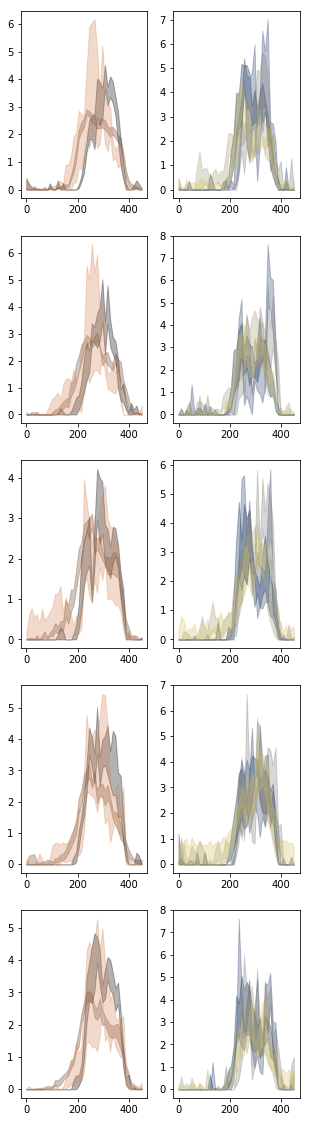

In [67]:
f,ax = plt.subplots(5,2,figsize=[5,20])
nbins = 45
cmaps = ['copper','cividis']
for i,L in enumerate([LD_rare,LD_fam]):
    nmice = len(L.keys())
    cm  = plt.cm.get_cmap(cmaps[i])
    for z, (k,v) in enumerate(L.items()):
        mu = v.mean(axis=-1)
        norm = np.amax(v.ravel())
        mu/=norm
        print(mu.shape)
        sem = sp.stats.sem(v/norm,axis=-1)
#         sem/=norm
        for j, m in enumerate([0.,.25,.5,.75,1.]):
            ax[j,i].fill_between(np.linspace(0,450,num=nbins),mu[j,:]-sem[j,:],y2=mu[j,:]+sem[j,:],alpha=.3,color=cm(np.float(z/nmice)))
            ax[j,i].set_ylim([0,.8])
f.savefig("")

In [4]:
# plot lick rate vs position for 0% and 100% for each session compare rare and familiar



In [5]:
# function for lick accuracy (percent of licks in 50 cm preceding reward bin)

def lick_accuracy(lick_mat,edges,trial_info):
    
    

In [ ]:
# lick accuracy over imaging sessions, broken down by morph value